In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import seaborn as sns
import pickle
import ast
import re

In [25]:
CURRENT_FOLDER = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
RESULTS_FOLDER = os.path.join(CURRENT_FOLDER, "results")

In [26]:
timer_results_path = os.path.join(RESULTS_FOLDER, "napsu_MCMC_time_vs_epsilon_comparison.csv")
original_lr_results_path = os.path.join(RESULTS_FOLDER, "original_logistic_regression_results.csv")
synthetic_lr_results_path = os.path.join(RESULTS_FOLDER, "synthetic_logistic_regression_results.csv")

timer_results_df = pd.read_csv(timer_results_path)
original_lr_results_df = pd.read_csv(original_lr_results_path)
synthetic_lr_results_df = pd.read_csv(synthetic_lr_results_path)

In [27]:
timer_results_df

,Unnamed: 0,experiment_id,start,stop,timedelta,task,dataset_name,query,epsilon,delta,MCMC_algo,laplace_approximation,query_str,query_list,n_canonical_queries
0,0,J9NST4D0,1.558460e+07,1.558501e+07,412.454065,Main run,binary4d,empty,0.1,1.000000e-10,NUTS,True,NaN,NaN,NaN
1,1,J9NST4D0,1.558460e+07,1.558461e+07,8.468874,Query selection,binary4d,NaN,0.1,1.000000e-10,NUTS,True,empty,[],NaN
2,2,J9NST4D0,1.558461e+07,1.558461e+07,0.000192,Calculating full marginal query,binary4d,NaN,0.1,1.000000e-10,NUTS,True,empty,[],NaN
3,3,J9NST4D0,1.558461e+07,1.558461e+07,0.052028,Calculating canonical query set,binary4d,NaN,0.1,1.000000e-10,NUTS,True,empty,[],NaN
4,4,J9NST4D0,1.558461e+07,1.558498e+07,375.243121,Laplace approximation,binary4d,NaN,0.1,1.000000e-10,NUTS,True,empty,[],7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,GN5KSIHK,1.560673e+07,1.560673e+07,7.416237,Query selection,binary3d,NaN,8.0,1.000000e-10,NUTS,True,AB+BC+AC,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",NaN
416,416,GN5KSIHK,1.560673e+07,1.560673e+07,0.000134,Calculating full marginal query,binary3d,NaN,8.0,1.000000e-10,NUTS,True,AB+BC+AC,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",NaN
417,417,GN5KSIHK,1.560673e+07,1.560673e+07,0.005820,Calculating canonical query set,binary3d,NaN,8.0,1.000000e-10,NUTS,True,AB+BC+AC,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",NaN
418,418,GN5KSIHK,1.560673e+07,1.560680e+07,67.767581,Laplace approximation,binary3d,NaN,8.0,1.000000e-10,NUTS,True,AB+BC+AC,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",6.0


In [28]:
original_lr_results_df

,dataset_name,accuracy,balanced_accuracy,F1,coefficients,point_estimates,variance_estimates,confidence_intervals
0,binary4d,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[ 1.02625708 -0.00650265 2.00140714]],[[ 1.02258994 -0.01088867 1.99866304]],[[0.00021074 0.00018442 0.00030877]],"{0.95: array([[[ 0.99413761, 1.05104227],\n ..."
1,binary3d,[0.6134 0.6212 0.6156 0.6111 0.6164],[0.61873112 0.56656465 0.56366211 0.61780554 0...,[0.65401826 0.72330168 0.71660277 0.65004949 0...,[[ 1.01258733 -0.00628954]],[[ 1.01333173 -0.005663 ]],[[0.00013077 0.00011474]],"{0.95: array([[[ 0.99091841, 1.03574506],\n ..."


In [29]:
synthetic_lr_results_df

,experiment_id,dataset_name,dataset_index,query,epsilon,MCMC_algorithm,accuracy,balanced_accuracy,F1,coefficients,point_estimates,variance_estimates,confidence_intervals
0,J9NST4D0,binary4d,0.0,[],0.1,NUTS,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[ 8.57200542e-01 -1.70604644e-03 1.87110943e...,[[0.93952818 0.0910975 1.93964098]],[[0.000211 0.00017982 0.00030786]],"{0.95: array([[[0.91105838, 0.96799798],\n ..."
1,J9NST4D0,binary4d,1.0,[],0.1,NUTS,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[0.88559874 0.01353439 1.81487827]],[[0.93639179 0.0706775 1.85890114]],[[0.00020824 0.00017862 0.00028544]],"{0.95: array([[[0.90810841, 0.96467518],\n ..."
2,J9NST4D0,binary4d,2.0,[],0.1,NUTS,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[0.9167418 0.00329622 1.92848061]],[[0.95569345 0.04769811 1.9610968 ]],[[0.00021334 0.00017881 0.00031174]],"{0.95: array([[[0.92706586, 0.98432103],\n ..."
3,J9NST4D0,binary4d,3.0,[],0.1,NUTS,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[ 0.80282827 -0.00764482 1.93114483]],[[0.85785964 0.05379267 1.97646288]],[[0.00020408 0.00017798 0.00030495]],"{0.95: array([[[0.82986036, 0.88585891],\n ..."
4,J9NST4D0,binary4d,4.0,[],0.1,NUTS,[0.7678 0.7664 0.7702 0.7672 0.7665],[0.59331879 0.5 0.60039019 0.59620009 0...,[0.85872475 0.86775362 0.85975833 0.8579275 0...,[[ 0.87715121 -0.01903948 1.84408769]],[[0.9576154 0.07125291 1.91188009]],[[0.00021052 0.00018112 0.00030001]],"{0.95: array([[[0.92917749, 0.98605332],\n ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,GN5KSIHK,binary3d,6.0,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",8.0,NUTS,[0.6134 0.6212 0.6156 0.6111 0.6164],[0.61873112 0.56656465 0.56366211 0.61780554 0...,[0.65401826 0.72330168 0.71660277 0.65004949 0...,[[1.00359615 0.00415937]],[[1.00502759 0.00556746]],[[0.00013155 0.00011498]],"{0.95: array([[[ 0.98254814, 1.02750705],\n ..."
766,GN5KSIHK,binary3d,7.0,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",8.0,NUTS,[0.6134 0.6212 0.6156 0.6111 0.6164],[0.61873112 0.56656465 0.56366211 0.61780554 0...,[0.65401826 0.72330168 0.71660277 0.65004949 0...,[[ 1.03181527e+00 -1.91288629e-04]],[[ 1.02864629 -0.00400135]],[[0.00013179 0.00011436]],"{0.95: array([[[ 1.00614593, 1.05114666],\n ..."
767,GN5KSIHK,binary3d,8.0,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",8.0,NUTS,[0.6134 0.6212 0.6156 0.6111 0.6164],[0.61873112 0.56656465 0.56366211 0.61780554 0...,[0.65401826 0.72330168 0.71660277 0.65004949 0...,[[1.03153139 0.01472146]],[[1.01871332e+00 4.91295381e-05]],[[0.00013189 0.00011488]],"{0.95: array([[[ 0.99620407, 1.04122258],\n ..."
768,GN5KSIHK,binary3d,9.0,"[['A', 'B'], ['B', 'C'], ['A', 'C']]",8.0,NUTS,[0.6134 0.6212 0.6156 0.6111 0.6164],[0.61873112 0.56656465 0.56366211 0.61780554 0...,[0.65401826 0.72330168 0.71660277 0.65004949 0...,[[ 1.00686525 -0.00698123]],[[ 1.004618 -0.00971249]],[[0.00013033 0.00011457]],"{0.95: array([[[ 0.98224283, 1.02699317],\n ..."


In [30]:
def map_string_np_array(string):
    # Remove space after [
    string = re.sub('\[ +', '[', string.strip())
    # Replace commas and spaces
    string = re.sub('[,\s]+', ', ', string)
    return np.array(ast.literal_eval(string))

#### Binary3d

In [31]:
original_3d_lr_results_df = original_lr_results_df[original_lr_results_df['dataset_name'] == 'binary3d']
synthetic_3d_lr_results_df = synthetic_lr_results_df[synthetic_lr_results_df['dataset_name'] == 'binary3d']
original_4d_lr_results_df = original_lr_results_df[original_lr_results_df['dataset_name'] == 'binary4d']
synthetic_4d_lr_results_df = synthetic_lr_results_df[synthetic_lr_results_df['dataset_name'] == 'binary4d']

In [32]:
map_string_np_array(original_3d_lr_results_df['point_estimates'].item())

array([[ 1.01333173, -0.005663  ]])

In [33]:
def map_string_to_list(string):
    return np.fromstring(string)

In [34]:
def query_to_str(query_str):
    query_list = ast.literal_eval(query_str)
    query_str = ""
    for index, pair in enumerate(query_list):
        for letter in pair:
            query_str = f"{query_str}{letter}"
            
        if index != len(query_list) - 1:
            query_str = f"{query_str}+"

    return query_str

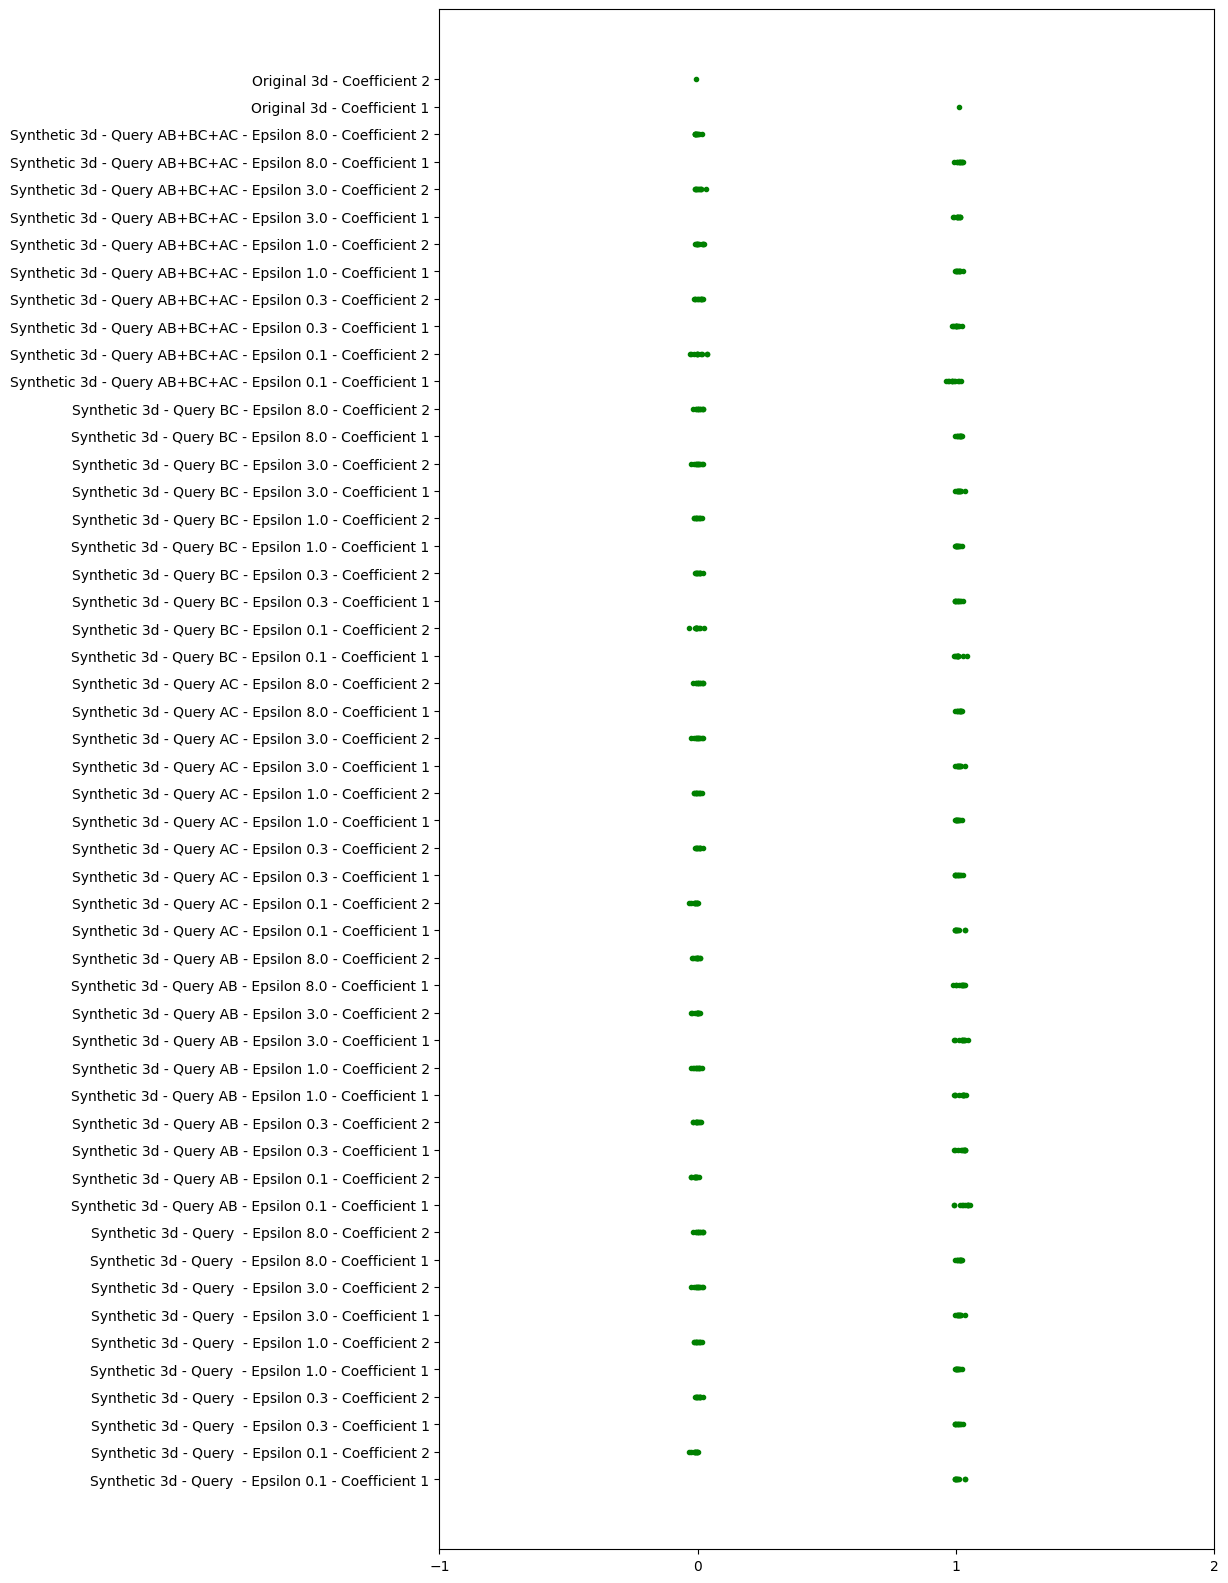

In [35]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
plt.subplots(figsize=(10, 20))

original_3d_point_estimates = map_string_np_array(original_3d_lr_results_df['point_estimates'].item())[0]
original_3d_variance_estimates = map_string_np_array(original_3d_lr_results_df['variance_estimates'].item())[0]

for index, row in synthetic_3d_lr_results_df.iterrows():
    synthetic_3d_point_estimates = map_string_np_array(row['point_estimates'])[0]
    synthetic_3d_variance_estimates = map_string_np_array(row['variance_estimates'])[0]
    
    query_string = query_to_str(row['query'])
    epsilon = row['epsilon']
    dataset_index = row['dataset_index']
    plt.errorbar(synthetic_3d_point_estimates, y=[f"Synthetic 3d - Query {query_string} - Epsilon {epsilon} - Coefficient 1", f"Synthetic 3d - Query {query_string} - Epsilon {epsilon} - Coefficient 2"], xerr=synthetic_3d_variance_estimates, fmt=".", color="green")

    
plt.errorbar(original_3d_point_estimates, y=[f"Original 3d - Coefficient 1", f"Original 3d - Coefficient 2"], xerr=original_3d_variance_estimates, fmt=".", color="green")

    
plt.xticks(range(-1, 3))
#plt.tight_layout()
plt.show()